# Martingale
 1.   Martingales as a stochastic process in measure theory
 2.   Connection of the martingale to the financial market
 3.   Implementation of Martingale for a particular stock in particular period of time





In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/martingale/AAPL.csv')
df.head()

,Date,Adj_Close
0,6/3/2019,1036.229980
1,6/4/2019,1053.050049
2,6/5/2019,1042.219971
3,6/6/2019,1044.339966
4,6/7/2019,1066.040039


In [4]:
df.rename(columns={'Adj_Close':'price'}, inplace=True)

In [5]:
df

,Date,price
0,6/3/2019,1036.229980
1,6/4/2019,1053.050049
2,6/5/2019,1042.219971
3,6/6/2019,1044.339966
4,6/7/2019,1066.040039
...,...,...
3893,NaN,NaN
3894,NaN,NaN
3895,NaN,NaN
3896,NaN,NaN


In [6]:
df.isna().sum()

Date     3750
price    3750
dtype: int64

In [7]:

df = df[:148]
# df['Date'] =  pd.to_datetime(df['Date'])
# df.set_index('Date', inplace = True)

In [8]:
df

,Date,price
0,6/3/2019,1036.229980
1,6/4/2019,1053.050049
2,6/5/2019,1042.219971
3,6/6/2019,1044.339966
4,6/7/2019,1066.040039
...,...,...
143,12/24/2019,1343.560059
144,12/26/2019,1360.400024
145,12/27/2019,1351.890015
146,12/30/2019,1336.140015


In [9]:
prev_close = []
for i in range(len(df)):
  if i==0:
    prev_close.append('NAN')
  else:
    prev_close.append(df['price'][i-1])
print(prev_close)
df['previous_close'] = prev_close

['NAN', 1036.22998, 1053.050049, 1042.219971, 1044.339966, 1066.040039, 1080.380005, 1078.719971, 1077.030029, 1088.77002, 1085.349976, 1092.5, 1103.599976, 1102.329956, 1111.420044, 1121.880005, 1115.52002, 1086.349976, 1079.800049, 1076.01001, 1080.910034, 1097.949951, 1111.25, 1121.579956, 1131.589966, 1116.349976, 1124.829956, 1140.47998, 1144.209961, 1144.900024, 1150.339966, 1153.579956, 1146.349976, 1146.329956, 1130.099976, 1138.069946, 1146.209961, 1137.810059, 1132.119995, 1250.410034, 1239.410034, 1225.140015, 1216.680054, 1209.01001, 1193.98999, 1152.319946, 1169.949951, 1173.98999, 1204.800049, 1188.01001, 1174.709961, 1197.27002, 1164.290039, 1167.26001, 1177.599976, 1198.449951, 1182.689941, 1191.25, 1189.530029, 1151.290039, 1168.890015, 1167.839966, 1171.02002, 1192.849976, 1188.099976, 1168.390015, 1181.410034, 1211.380005, 1204.930054, 1204.410034, 1206.0, 1220.170044, 1234.25, 1239.560059, 1231.300049, 1229.150024, 1232.410034, 1238.709961, 1229.930054, 1234.030029,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df

,Date,price,previous_close
0,6/3/2019,1036.229980,NAN
1,6/4/2019,1053.050049,1036.23
2,6/5/2019,1042.219971,1053.05
3,6/6/2019,1044.339966,1042.22
4,6/7/2019,1066.040039,1044.34
...,...,...,...
143,12/24/2019,1343.560059,1348.84
144,12/26/2019,1360.400024,1343.56
145,12/27/2019,1351.890015,1360.4
146,12/30/2019,1336.140015,1351.89


We begin with one AAPL stock and increase the transaction volume or quantity on losing trades by a factor of two. Winning trades are valued at a 1.5% increase, while losing trades are valued at a 1.5% decline from the previous close price.

In [11]:
signal = []
for i in range(len(df)):
  if i ==0:
    signal.append(0)
  elif df['price'][i] > (1.015)*df['previous_close'][i]:
    signal.append(1)
  elif df['price'][i] < (0.985)*df['previous_close'][i]:
    signal.append(-1)
  else:
    signal.append(0)


In [12]:
df['signal'] = signal      #signal is for next day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
quantity = [1,1]
for i in range(2, len(df)):
  if df['signal'][i-1]==-1:
    quantity.append(quantity[i-1]*2)
  else:
    quantity.append(quantity[i-1])
  


In [14]:
df['quantity']=quantity          #quantity is number of stocks owned by you on that day
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,price,previous_close,signal,quantity
0,6/3/2019,1036.229980,NAN,0,1
1,6/4/2019,1053.050049,1036.23,1,1
2,6/5/2019,1042.219971,1053.05,0,1
3,6/6/2019,1044.339966,1042.22,0,1
4,6/7/2019,1066.040039,1044.34,1,1
...,...,...,...,...,...
143,12/24/2019,1343.560059,1348.84,0,256
144,12/26/2019,1360.400024,1343.56,0,256
145,12/27/2019,1351.890015,1360.4,0,256
146,12/30/2019,1336.140015,1351.89,0,256


Now, i am taking one assumption that buyer is buying stock at the end of the day at the time of -1 signal

In [15]:
invested = ['NAN',df['price'][0]]
for i in range(2, len(df)):
  if df['quantity'][i]==df['quantity'][i-1]:
    invested.append(invested[i-1])
  else:
    invested.append(invested[i-1]+(df['previous_close'][i]*(df['quantity'][i]-df['quantity'][i-1])))
invested

['NAN',
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 1036.22998,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 2122.579956,
 4427.219848000001,
 4427.219848000001,
 4427.219848000001,
 4427.219848000001,
 4427.219848000001,
 4427.219848000001,
 4427.219848000001,
 9084.380004,
 9084.380004,
 9084.380004,
 9084.380004,
 9084.380004,
 9084.380004,
 9084.380004,
 18294.700316000002,
 18294.700316000002,
 18294.700316000002,
 18294.700316000002,
 18294.700316000002,
 18294.700316000002,
 36988.940556,
 36988.940556

In [16]:
df['invested_money'] = invested

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df

,Date,price,previous_close,signal,quantity,invested_money
0,6/3/2019,1036.229980,NAN,0,1,NAN
1,6/4/2019,1053.050049,1036.23,1,1,1036.23
2,6/5/2019,1042.219971,1053.05,0,1,1036.23
3,6/6/2019,1044.339966,1042.22,0,1,1036.23
4,6/7/2019,1066.040039,1044.34,1,1,1036.23
...,...,...,...,...,...,...
143,12/24/2019,1343.560059,1348.84,0,256,312361
144,12/26/2019,1360.400024,1343.56,0,256,312361
145,12/27/2019,1351.890015,1360.4,0,256,312361
146,12/30/2019,1336.140015,1351.89,0,256,312361


In [18]:
returns =[]
returns_per = []
for i in range(len(df)):
  if i == 0:
    returns.append('NAN')
    returns_per.append('NAN')
  else:
    returns.append((df['price'][i]-df['previous_close'][i])*df['quantity'][i])
    returns_per.append(returns[i]/(df['previous_close'][i]*df['quantity'][i]))
df['returns'] = returns
df['returns_in_per'] = returns_per


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [19]:
df


,Date,price,previous_close,signal,quantity,invested_money,returns,returns_in_per
0,6/3/2019,1036.229980,NAN,0,1,NAN,NAN,NAN
1,6/4/2019,1053.050049,1036.23,1,1,1036.23,16.8201,0.016232
2,6/5/2019,1042.219971,1053.05,0,1,1036.23,-10.8301,-0.0102845
3,6/6/2019,1044.339966,1042.22,0,1,1036.23,2.12,0.00203411
4,6/7/2019,1066.040039,1044.34,1,1,1036.23,21.7001,0.0207787
...,...,...,...,...,...,...,...,...
143,12/24/2019,1343.560059,1348.84,0,256,312361,-1351.66,-0.00391441
144,12/26/2019,1360.400024,1343.56,0,256,312361,4311.03,0.0125338
145,12/27/2019,1351.890015,1360.4,0,256,312361,-2178.56,-0.00625552
146,12/30/2019,1336.140015,1351.89,0,256,312361,-4032,-0.0116504


In [20]:
cumulative_returns = ['NAN']
cumulative_returns_per = ['NAN']
net_returns = 0
for i in range(1, len(df)):
  net_returns+=df['returns'][i]
  cumulative_returns.append(net_returns)
  cumulative_returns_per.append((net_returns*100)/df['invested_money'][i])


df['cumulative_returns'] = cumulative_returns
df['cumulative_returns_in_per'] = cumulative_returns_per



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [21]:
df

,Date,price,previous_close,signal,quantity,invested_money,returns,returns_in_per,cumulative_returns,cumulative_returns_in_per
0,6/3/2019,1036.229980,NAN,0,1,NAN,NAN,NAN,NAN,NAN
1,6/4/2019,1053.050049,1036.23,1,1,1036.23,16.8201,0.016232,16.8201,1.6232
2,6/5/2019,1042.219971,1053.05,0,1,1036.23,-10.8301,-0.0102845,5.98999,0.578056
3,6/6/2019,1044.339966,1042.22,0,1,1036.23,2.12,0.00203411,8.10999,0.782643
4,6/7/2019,1066.040039,1044.34,1,1,1036.23,21.7001,0.0207787,29.8101,2.87678
...,...,...,...,...,...,...,...,...,...,...
143,12/24/2019,1343.560059,1348.84,0,256,312361,-1351.66,-0.00391441,31590.6,10.1135
144,12/26/2019,1360.400024,1343.56,0,256,312361,4311.03,0.0125338,35901.6,11.4936
145,12/27/2019,1351.890015,1360.4,0,256,312361,-2178.56,-0.00625552,33723.1,10.7962
146,12/30/2019,1336.140015,1351.89,0,256,312361,-4032,-0.0116504,29691.1,9.50537


In [22]:
date = df['Date'].tolist

In [23]:
cumulative_returns_per

['NAN',
 1.6231984525288368,
 0.5780561376925147,
 0.7826434436880445,
 2.876780210508859,
 4.260639612067575,
 4.100440232389331,
 3.9373546208342614,
 5.070306883033808,
 4.740260072382764,
 5.430263656336205,
 6.501452119731172,
 6.378890523897018,
 7.256117411310556,
 8.26554207590094,
 7.651780157914352,
 4.836763746210074,
 1.7441105997139572,
 1.386994346987035,
 1.848698885951411,
 3.454284291752733,
 4.707480805024617,
 5.680820440198298,
 6.624013178045858,
 5.188025812112206,
 5.987051542665187,
 7.461674343635425,
 7.813131634038665,
 7.878152788888392,
 8.39073107689329,
 8.696018987564585,
 8.0147744502681,
 8.012888066676911,
 6.483618937933658,
 7.234588999388445,
 8.001581543249058,
 7.210101158610949,
 6.673955136510297,
 17.81982869153222,
 16.783354190875055,
 15.438762298384763,
 14.641622857198026,
 13.918913309478171,
 12.503652606809034,
 8.577294602512495,
 5.7051595509561865,
 6.070177701281391,
 8.853871311068433,
 7.336888683012599,
 6.135227192810504,
 8.17

In [24]:
df

,Date,price,previous_close,signal,quantity,invested_money,returns,returns_in_per,cumulative_returns,cumulative_returns_in_per
0,6/3/2019,1036.229980,NAN,0,1,NAN,NAN,NAN,NAN,NAN
1,6/4/2019,1053.050049,1036.23,1,1,1036.23,16.8201,0.016232,16.8201,1.6232
2,6/5/2019,1042.219971,1053.05,0,1,1036.23,-10.8301,-0.0102845,5.98999,0.578056
3,6/6/2019,1044.339966,1042.22,0,1,1036.23,2.12,0.00203411,8.10999,0.782643
4,6/7/2019,1066.040039,1044.34,1,1,1036.23,21.7001,0.0207787,29.8101,2.87678
...,...,...,...,...,...,...,...,...,...,...
143,12/24/2019,1343.560059,1348.84,0,256,312361,-1351.66,-0.00391441,31590.6,10.1135
144,12/26/2019,1360.400024,1343.56,0,256,312361,4311.03,0.0125338,35901.6,11.4936
145,12/27/2019,1351.890015,1360.4,0,256,312361,-2178.56,-0.00625552,33723.1,10.7962
146,12/30/2019,1336.140015,1351.89,0,256,312361,-4032,-0.0116504,29691.1,9.50537


In [25]:
#df['Date'] =  pd.to_datetime(df['Date'])
# df.set_index('Date', inplace = True)

In [26]:
# df['Date'] =  pd.to_datetime(df['Date'])
# df.set_index('Date', inplace = True)

In [27]:
df

,Date,price,previous_close,signal,quantity,invested_money,returns,returns_in_per,cumulative_returns,cumulative_returns_in_per
0,6/3/2019,1036.229980,NAN,0,1,NAN,NAN,NAN,NAN,NAN
1,6/4/2019,1053.050049,1036.23,1,1,1036.23,16.8201,0.016232,16.8201,1.6232
2,6/5/2019,1042.219971,1053.05,0,1,1036.23,-10.8301,-0.0102845,5.98999,0.578056
3,6/6/2019,1044.339966,1042.22,0,1,1036.23,2.12,0.00203411,8.10999,0.782643
4,6/7/2019,1066.040039,1044.34,1,1,1036.23,21.7001,0.0207787,29.8101,2.87678
...,...,...,...,...,...,...,...,...,...,...
143,12/24/2019,1343.560059,1348.84,0,256,312361,-1351.66,-0.00391441,31590.6,10.1135
144,12/26/2019,1360.400024,1343.56,0,256,312361,4311.03,0.0125338,35901.6,11.4936
145,12/27/2019,1351.890015,1360.4,0,256,312361,-2178.56,-0.00625552,33723.1,10.7962
146,12/30/2019,1336.140015,1351.89,0,256,312361,-4032,-0.0116504,29691.1,9.50537


In [28]:
df.to_csv("/content/drive/MyDrive/martingale/apple.csv", index=False)

TypeError: ignored

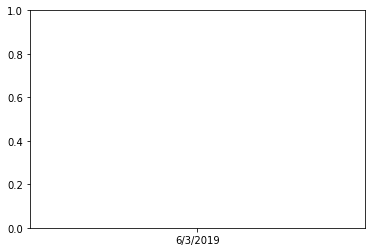

In [29]:
plt.plot(df.loc[:,'Date'], df.loc[:,'cumulative_returns_in_per'], label='cumulative return in percentage Vs time')